In [2]:
# %matplotlib inline
# import mpld3
# import mplcursors
# mpld3.enable_notebook()

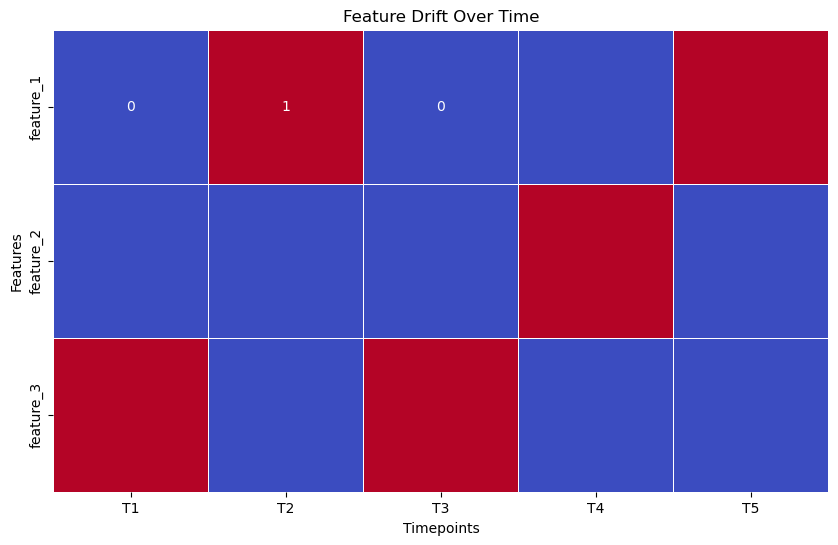

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Sample data
data = {
    "timepoint": ["T1", "T2", "T3", "T4", "T5"],
    "feature_1": [0, 1, 0, 0, 1],
    "feature_2": [0, 0, 0, 1, 0],
    "feature_3": [1, 0, 1, 0, 0],
}
df = pd.DataFrame(data)
df.set_index("timepoint", inplace=True)
df = df.T  # Transpose to have features on the y-axis and timepoints on the x-axis

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title("Feature Drift Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Features")
plt.show()

<Axes: xlabel='timepoint'>

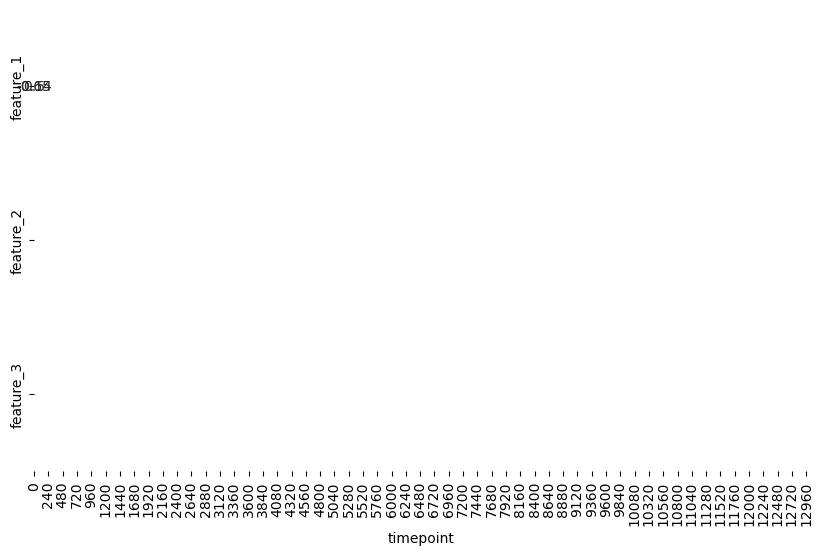

In [8]:
import pandas as pd
import numpy as np

# Sample data for scatter plots
np.random.seed(42)
timepoints = [i for i in range(0, 13010, 10)]
feature_data = {
    "timepoint": timepoints,
    "feature_1": np.random.randn(len(timepoints)),
    "feature_2": np.random.randn(len(timepoints)),
    "feature_3": np.random.randn(len(timepoints)),
}
scatter_df = pd.DataFrame(feature_data)

# Sample data for heatmap
heatmap_data = {
    "timepoint": timepoints,
    "feature_1": [0, 1, 0, 0, 1],
    "feature_2": [0, 0, 0, 1, 0],
    "feature_3": [1, 0, 1, 0, 0],
}
heatmap_df = pd.DataFrame(feature_data)
heatmap_df.set_index("timepoint", inplace=True)
heatmap_df = (
    heatmap_df.T
)  # Transpose to have features on the y-axis and timepoints on the x-axis
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", cbar=False, linewidths=0.5, ax=ax)

In [ ]:
feature_1 = [
    {"linear_drift": {"start_tp": 30, "end_tp": 40}},
    {"sudden_drift": {"start_tp": 100, "end_tp": 200}},
    {"gradual_drift": {"start_tp": 100, "end_tp": 200}},
]

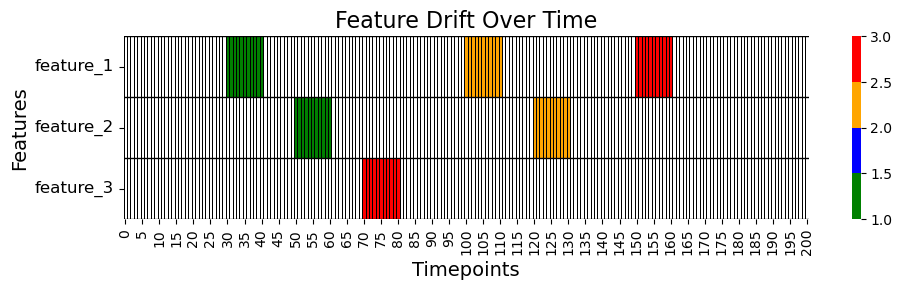

In [40]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap


# Define the features with their drifts
features_drift_data = {
    "feature_1": [
        {"linear_drift": {"start_tp": 30, "end_tp": 40}},
        {"sudden_drift": {"start_tp": 100, "end_tp": 110}},
        {"gradual_drift": {"start_tp": 150, "end_tp": 160}},
    ],
    "feature_2": [
        {"linear_drift": {"start_tp": 50, "end_tp": 60}},
        {"sudden_drift": {"start_tp": 120, "end_tp": 130}},
    ],
    "feature_3": [{"gradual_drift": {"start_tp": 70, "end_tp": 80}}],
}

# Define time points range
timepoints = np.arange(0, 201)  # Adjust as needed for your time range

# Initialize an empty DataFrame to hold drift information
drift_df = pd.DataFrame(0, index=features_drift_data.keys(), columns=timepoints)

# Map drift types to numbers
drift_type_map = {"linear_drift": 1, "sudden_drift": 2, "gradual_drift": 3}

# Populate the DataFrame with drift information
for feature, drifts in features_drift_data.items():
    for drift in drifts:
        for drift_type, time_range in drift.items():
            start_tp = time_range["start_tp"]
            end_tp = time_range["end_tp"]
            drift_df.loc[feature, start_tp:end_tp] = drift_type_map[drift_type]

# Replace 0 with NaN to make the rest of the graph white
drift_df.replace(0, np.nan, inplace=True)

# Create a custom colormap
colors = ["green", "blue", "orange", "red"]
n_bins = [1, 1, 1, 1]  # Bin sizes for each color
cmap = ListedColormap(colors)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 3))  # Width x Height
sns.heatmap(
    drift_df,
    annot=False,
    cmap=cmap,
    cbar=True,
    linewidths=0.5,
    linecolor="black",
    ax=ax,
)


# Set the size of each cell
ax.set_yticks(np.arange(len(drift_df.index)) + 0.5)
ax.set_yticklabels(drift_df.index, rotation=0, fontsize=12)
# ax.set_xticks(np.arange(len(drift_df.columns)) + 0.5)
# ax.set_xticklabels(drift_df.columns, rotation=90, fontsize=10)

# Add horizontal lines to separate each feature row
for idx in range(len(drift_df.index) + 1):
    ax.hlines(idx, *ax.get_xlim(), color="black", linewidth=1)

ax.set_title("Feature Drift Over Time", fontsize=16)
ax.set_xlabel("Timepoints", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

plt.tight_layout()
plt.show()